<a href="https://colab.research.google.com/github/edada2018/Big-Data-Analysis---Standard-CNN-and-Bagging-Learning-CNN/blob/main/E_Dada_Big_Data_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: Convolutional Neural Network (CNN) Based Bagging Learning for Image Classification

##Step 1: Set up the environment

In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install --upgrade jax jaxlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33


##Step 2: Import necessary libraries

In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time

###Step 3: Load and preprocess CIFAR-100 dataset

In [ ]:
# Step 3: Load and preprocess CIFAR-100 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_full = to_categorical(y_train_full, 100)
y_test = to_categorical(y_test, 100)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Split original training data into training (90%) and validation (10%) sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42
)

# Print dataset sizes
print("Training set size:", x_train.shape[0])
print("Validation set size:", x_val.shape[0])
print("Testing set size:", x_test.shape[0])

Training set size: 45000
Validation set size: 5000
Testing set size: 10000


### # Step 4: Define the CNN model architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the CNN model architecture
def create_model():
    model = Sequential([
        # First block
        Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),  # Batch Normalization added
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # Second block
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # Third block
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        # Dense layers
        Flatten(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),  # Increased dropout rate
        Dense(100, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [ ]:
# Create and compile the model
standard_cnn = create_model()

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history_standard = standard_cnn.fit(
    datagen.flow(x_train, y_train, batch_size=32), # Reduced batch size
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.0586 - loss: 4.9511 - val_accuracy: 0.1554 - val_loss: 3.6502 - learning_rate: 0.0010
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.1526 - loss: 3.7685 - val_accuracy: 0.2448 - val_loss: 3.2005 - learning_rate: 0.0010
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.2334 - loss: 3.1657 - val_accuracy: 0.3022 - val_loss: 2.8567 - learning_rate: 0.0010
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.2959 - loss: 2.7960 - val_accuracy: 0.3538 - val_loss: 2.5157 - learning_rate: 0.0010
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.3468 - loss: 2.5274 - val_accuracy: 0.4306 - val_loss: 2.1638 - learning_rate: 0.0010
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.3716 - loss: 2.3729 - val_accuracy: 0.4214 - val_loss: 2.2902 - learning_rate: 0.0010
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0

 ## Step 5: Train the standard CNN

In [ ]:
# Step 5: Train the standard CNN
standard_cnn = create_model()

history_standard = standard_cnn.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.0709 - loss: 4.8554 - val_accuracy: 0.1350 - val_loss: 4.1304
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1891 - loss: 3.5701 - val_accuracy: 0.2942 - val_loss: 2.8652
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2894 - loss: 2.8997 - val_accuracy: 0.3522 - val_loss: 2.5664
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3602 - loss: 2.4861 - val_accuracy: 0.4400 - val_loss: 2.1056
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4134 - loss: 2.2029 - val_accuracy: 0.4742 - val_loss: 1.9629
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4627 - loss: 1.9916 - val_accuracy: 0.4914 - val_loss: 1.8800
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4890 - loss: 1.8654 - val_accuracy: 0.5022 - val_loss: 1.8029
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5306 - loss: 

# New step 6 Implement Bagging CNN

In [ ]:
# Step 6: Implement Bagging CNN
from sklearn.utils import resample

def train_bagging_models(num_models, x_train, y_train):
    models = []
    # Store history for each model
    histories = []
    for i in range(num_models):
        # Resample data with replacement
        x_resampled, y_resampled = resample(x_train, y_train)
        model = create_model()
        # Fit and store the history, including validation_split
        history = model.fit(x_resampled, y_resampled, epochs=100, batch_size=32, verbose=1, validation_split=0.2)  # Add validation_split
        models.append(model)
        histories.append(history)
    return models, histories # Return both models and histories

# Train 5 bagging models
bagging_models, bagging_histories = train_bagging_models(5, x_train, y_train) # Get both outputs

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.0659 - loss: 4.9556 - val_accuracy: 0.1523 - val_loss: 3.7180
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1819 - loss: 3.6009 - val_accuracy: 0.2847 - val_loss: 2.8869
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2906 - loss: 2.9049 - val_accuracy: 0.3544 - val_loss: 2.5089
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3668 - loss: 2.4523 - val_accuracy: 0.3850 - val_loss: 2.4332
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4331 - loss: 2.1275 - val_accuracy: 0.5038 - val_loss: 1.8551
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4967 - loss: 1.8827 - val_accuracy: 0.5279 - val_loss: 1.7881
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5514 - loss: 1.6173 - val_accuracy: 0.5843 - val_loss: 1.5778
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5906 - loss: 

## Step 7: Test and evaluate models

In [ ]:
# Step 7: Test and evaluate models
# Evaluate standard CNN
standard_cnn_eval = standard_cnn.evaluate(x_test, y_test, verbose=0)

# Evaluate Bagging CNN
bagging_accuracies = []
for model in bagging_models:
    acc = model.evaluate(x_test, y_test, verbose=0)[1]
    bagging_accuracies.append(acc)

bagging_mean_accuracy = np.mean(bagging_accuracies)

print("\nStandard CNN Test Accuracy:", standard_cnn_eval[1])
print("Bagging CNN Mean Test Accuracy:", bagging_mean_accuracy)



Standard CNN Test Accuracy: 0.6040999889373779
Bagging CNN Mean Test Accuracy: 0.5255200028419494


# Step 8: Plot learning curves : Standard CNN Learning Curve

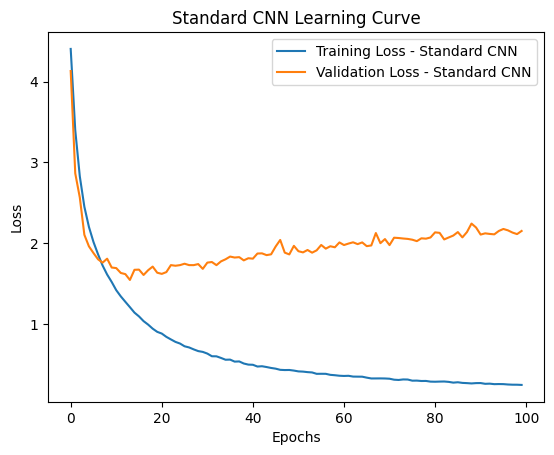

In [ ]:
# Step 8: Plot learning curves
# Standard CNN learning curve
plt.plot(history_standard.history['loss'], label='Training Loss - Standard CNN')
plt.plot(history_standard.history['val_loss'], label='Validation Loss - Standard CNN')
plt.title('Standard CNN Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 9: Bagging CNN learning curves

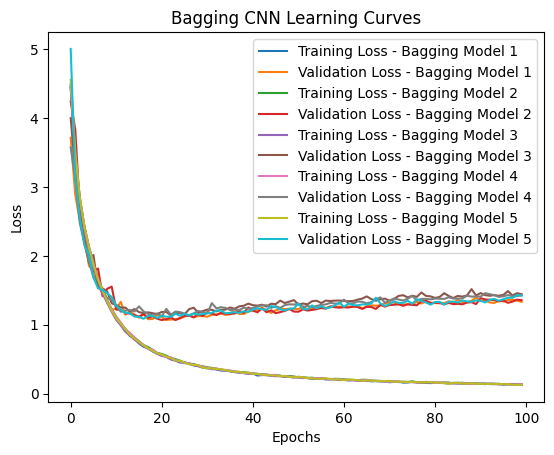

In [ ]:
# Bagging CNN learning curves
for i, (model, history) in enumerate(zip(bagging_models, bagging_histories)): # Iterate using zip
    plt.plot(history.history['loss'], label=f'Training Loss - Bagging Model {i+1}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss - Bagging Model {i+1}')
plt.title('Bagging CNN Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()